In [ ]:
# https://raw.githubusercontent.com/vbordalo/Communities-Crime/master/attributes.csv
# https://raw.githubusercontent.com/vbordalo/Communities-Crime/master/communities.data

In [117]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt

In [118]:
attrib = read_csv('https://raw.githubusercontent.com/pdanh2682000/Crime_KKDL_DoAn/main/Colab/attributes.csv', delim_whitespace = True)
data = read_csv('https://raw.githubusercontent.com/pdanh2682000/Crime_KKDL_DoAn/main/Colab/communities.data', names = attrib['attributes'])

In [119]:
print(data.shape)

(1994, 128)


In [120]:
data.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,...,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,...,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,...,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,...,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,...,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,...,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


Theo mô tả tập dữ liệu từ http://archive.ics.uci.edu/ml/datasets/Communities+and+Crime có 5 column non-predictive(có trị không dự đoán)
- state: tiểu bang được đánh số thứ tự 
- county: mã số cho quận
- community: mã số cộng đồng
- communityname: tên cộng đồng
- fold: dùng cho gỡ lỗi

In [88]:
data = data.drop(columns=['state','county',
                          'community','communityname',
                          'fold'], axis=1)
data.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,...,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,...,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,...,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,...,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,...,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.42,0.46,0.22,0.27,...,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


Chúng ta nhìn vào tập dữ liệu thấy rằng có những giá trị bị thiếu '?'

In [89]:
from pandas import DataFrame

# thay thế những giá trị ? thành giá trị mặc định NaN
data = data.replace('?', np.nan)
data.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,...,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,...,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,...,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,...,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,...,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.42,0.46,0.22,0.27,...,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [90]:
data.isnull().sum()

population                0
householdsize             0
racepctblack              0
racePctWhite              0
racePctAsian              0
                       ... 
LemasPctPolicOnPatr    1675
LemasGangUnitDeploy    1675
LemasPctOfficDrugUn       0
PolicBudgPerPop        1675
ViolentCrimesPerPop       0
Length: 123, dtype: int64

In [91]:
# lấy tên những cột mà có giá trị bất kì là null
feat_miss = data.columns[data.isnull().any()]
print(feat_miss)
feat_miss.shape

Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')


(23,)

Từ 123 column có chứa 23 column bị missing value

In [92]:
# Chúng ta quan sát thông tin từng column có giá trị bị thiếu
data[feat_miss[0:13]].describe()

,OtherPerCap,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp
count,1993,319,319,319,319,319,319,319,319,319,319,319,319
unique,97,38,52,34,55,44,59,75,52,76,74,73,54
top,0,0.02,0.2,0.98,0.19,0.02,0.14,0.23,0.2,0.78,0.72,0,0
freq,129,80,19,81,17,55,23,15,19,12,11,23,72


In [93]:
data[feat_miss[13:23]].describe()

,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,PolicBudgPerPop
count,319,319,319,319,319,319,319,319,319,319
unique,50,72,30,15,77,63,38,72,3,51
top,0,0.07,0.03,0.57,0.19,0.02,0.02,0.74,0,0.12
freq,189,14,48,54,12,27,69,13,126,22


Theo như tập dữ liêu ban đầu có 1994 record thì column OtherPerCap chỉ có 1 giá trị missing value => ta xử lý bằng điền giá trị bị thiếu với Imputer, những column còn lại ta loại bỏ chúng

In [94]:
# Ta có thể sử dụng Imputer để điền những giá trị missing value
data['OtherPerCap'].fillna(0, inplace=True)
data.shape

(1994, 123)

In [95]:
# loại bỏ những column missing value
data = data.dropna(axis=1)
print(data.shape)
data.head()

(1994, 101)


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,...,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,...,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,...,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,...,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,...,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.42,0.46,0.22,0.27,...,0.05,0.16,0.19,0.59,0.60,0.37,0.89,0.02,0.19,0.5,0.01,0.89,0.87,0.04,0.55,0.73,0.05,0.14,0.31,0.31,0.30,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


Theo như mô tả của tập dữ liệu ViolentCrimesPerPop là chứa giá trị cần dự đoán
- Đây là tổng số tội phạm bạo lực trên 100 nghìn dân số
- Được tính bằng cách lấy tổng dân số(population) và tổng số tội phạm về  murder, rape, robbery, and assault.

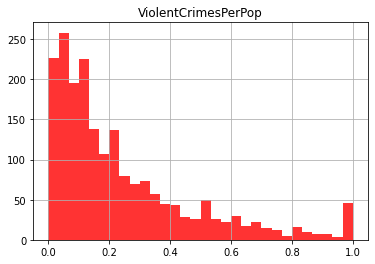

In [96]:
data.hist(column = ['ViolentCrimesPerPop'], bins = 30, color = 'red', alpha = 0.8)
plt.show()

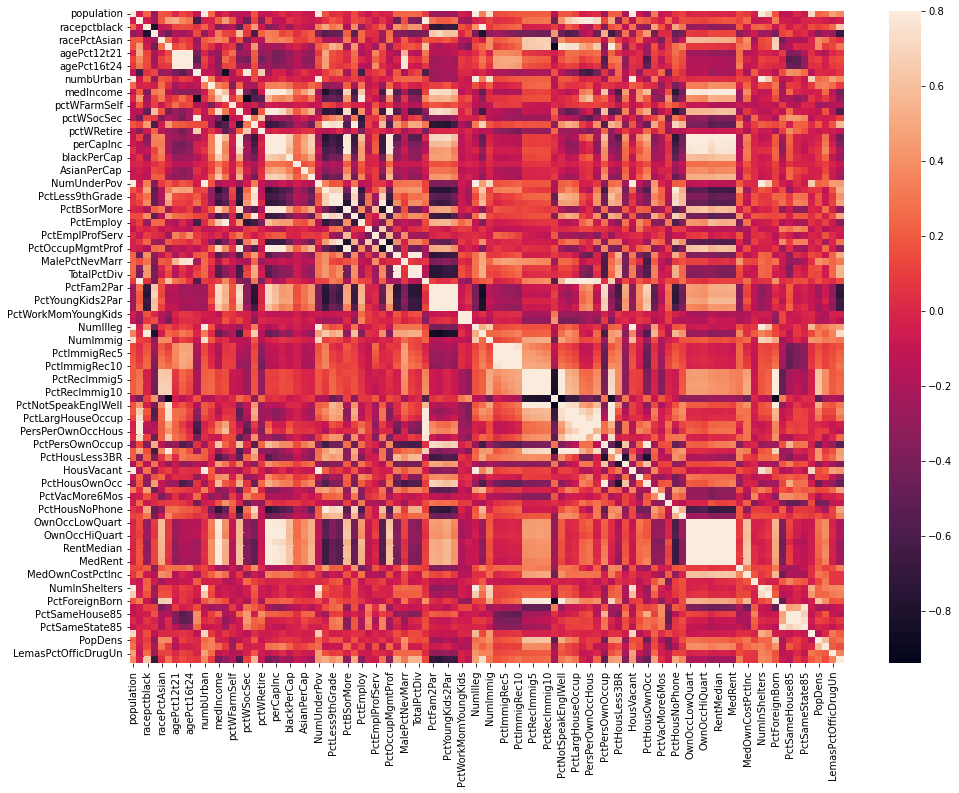

In [97]:
import seaborn as sns

corrmat = data.corr()
fig = plt.figure(figsize = (16, 12))

sns.heatmap(corrmat, vmax = 0.8)
plt.show()

Quan sát tập dữ liệu ta thấy có các column biểu diễn độ tuổi => Ta thử xem mối quan hệ giữa Tỉ lệ tội phạm và Độ tuổi như thế nào?
Có 4 mức cho độ tuổi như sau:
- agePct12t21: Đây là độ tuổi từ 12 -> 21
- agePct12t29: Đây là độ tuổi từ 12 -> 29
- agePct16t24: Đây là độ tuổi từ 16 -> 24
- agePct65up: Đây là độ tuổi từ >65

Text(0, 0.5, 'Age')

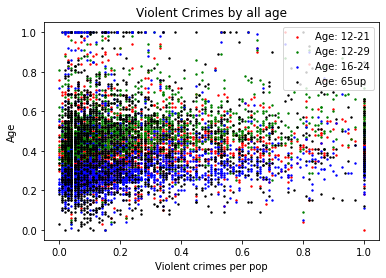

In [98]:
# Violent crime by age
ax1 = data.plot(x='ViolentCrimesPerPop', y='agePct12t21', kind='scatter', c='red', s=2, label='Age: 12-21')
ax2 = data.plot(x='ViolentCrimesPerPop', y='agePct12t29', kind='scatter', c='green', s=2, label='Age: 12-29', ax=ax1)
ax3 = data.plot(x='ViolentCrimesPerPop', y='agePct16t24', kind='scatter', c='blue', s=2, label='Age: 16-24', ax=ax2)
ax4 = data.plot(x='ViolentCrimesPerPop', y='agePct65up', kind='scatter', c='black', s=2, label='Age: 65up', ax=ax3)
plt.title('Violent Crimes by all age')
plt.xlabel('Violent crimes per pop')
plt.ylabel('Age')

Chúng ta có thể biểu diễn từng độ tuổi để dễ quan sát hơn

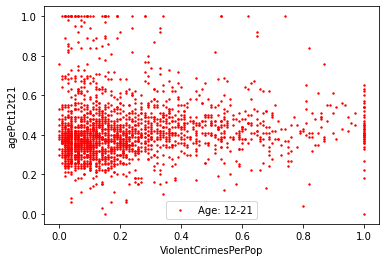

In [99]:
ax1 = data.plot(x='ViolentCrimesPerPop', y='agePct12t21', kind='scatter', c='red', s=2, label='Age: 12-21')

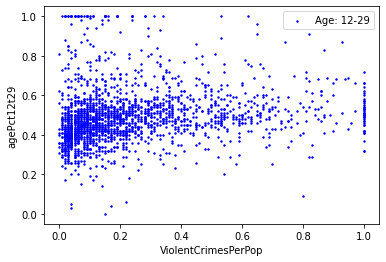

In [100]:
ax1 = data.plot(x='ViolentCrimesPerPop', y='agePct12t29', kind='scatter', c='blue', s=2, label='Age: 12-29')

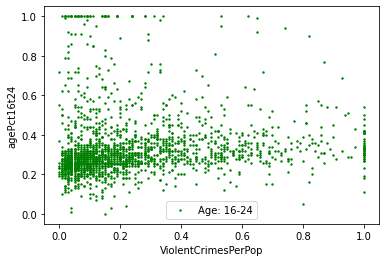

In [101]:
ax1 = data.plot(x='ViolentCrimesPerPop', y='agePct16t24', kind='scatter', c='green', s=2, label='Age: 16-24')

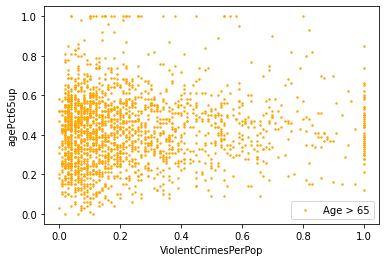

In [102]:
ax1 = data.plot(x='ViolentCrimesPerPop', y='agePct65up', kind='scatter', c='orange', s=2, label='Age > 65')

**I. Quan sát thuộc tính Goal ta thấy được giá trị của thuộc tính này thuộc kiểu liên tục => Xây dựng mô hình hồi quy**

In [103]:
# 100 column đầu tiên là features, column cuối cùng là Goal
from sklearn.model_selection import train_test_split
X = data.iloc[:, :100].values
y = data.iloc[:, 100].values

# Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print(X.shape)
print(y.shape)

(1994, 100)
(1994,)


- Vì tập dữ liệu của chúng ta rất lớn và chứa rất nhiều thuộc tính => Ta cần scale giá trị và giảm chiều dữ liệu.
- Ở đây ta sẽ giảm chiều xuống còn 14 bằng cách dùng PCA 

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components = 14)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(X_train.shape)

(1395, 14)


- Sau khi xử lý chiều dữ liệu xong ta tiến hành thử nghiệm với các mô hình hồi quy
- Ta sử dụng Cross_val_score để đánh giá mô hình bằng phương pháp K-Folds

LinearRegression :  [0.681 0.633 0.61  0.656 0.636 0.664 0.587 0.671 0.628 0.657]  - Mean:  0.642
DecisionTreeRegressor :  [0.353 0.2   0.295 0.224 0.2   0.059 0.11  0.356 0.14  0.226]  - Mean:  0.216
RandomForestRegressor :  [0.648 0.587 0.588 0.623 0.601 0.626 0.589 0.63  0.578 0.601]  - Mean:  0.607


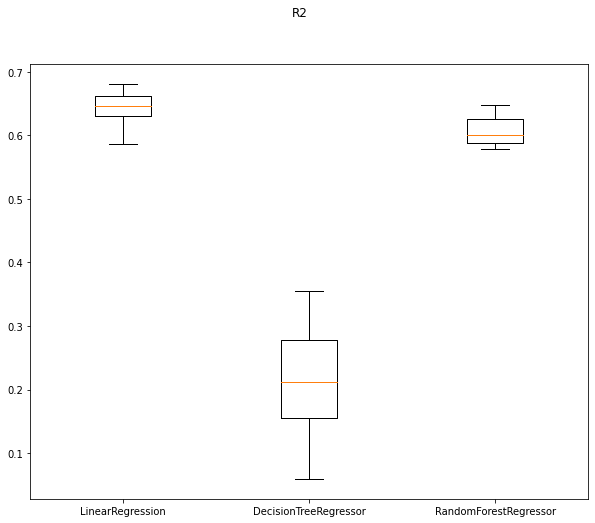

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

names = []
results = []
# ShuffleSplit hoạt động lặp đi lặp lại, KFold chỉ chia tập dữ liệu thành k phần. => Sử dụng ShuffleSplit tốt hơn!
# Ta chọn n=10 => sẽ có 10 lần lặp để đánh giá 1 mô hình
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

cv_results1 = cross_val_score(LinearRegression(), X_train, y_train, cv = cv, scoring = make_scorer(r2_score))
cv_results2 = cross_val_score(DecisionTreeRegressor(), X_train, y_train, cv = cv, scoring = make_scorer(r2_score))
cv_results3 = cross_val_score(RandomForestRegressor(), X_train, y_train, cv = cv, scoring = make_scorer(r2_score))

results.append(cv_results1)
results.append(cv_results2)
results.append(cv_results3)
names.append("LinearRegression")
names.append("DecisionTreeRegressor")
names.append("RandomForestRegressor")

print(names[0], ": ", np.round(cv_results1,3), " - Mean: ", np.round(cv_results1.mean(),3))
print(names[1], ": ", np.round(cv_results2,3) , " - Mean: ", np.round(cv_results2.mean(),3))
print(names[2], ": ", np.round(cv_results3,3) , " - Mean: ", np.round(cv_results3.mean(),3))

fig = plt.figure(figsize=(10,8))
fig.suptitle('R2')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Nhận xét: Mô hình LinearRegression có hiệu suất tốt nhất => chọn mô hình này nếu muốn dự đoán tỷ lệ tội phạm

(1395, 1)


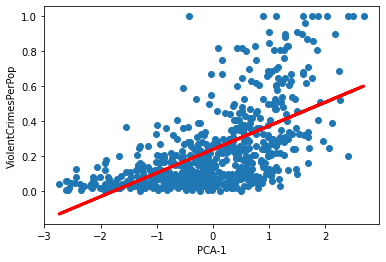

In [106]:
# Thử nghiệm trên mô hình LinearRegression
from sklearn import metrics

# Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Tiếp tục giảm chiều để tiện cho việc vẽ đồ thị để trực quan kết quả của mô hình hồi quy
pca = PCA(n_components = 1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(X_train.shape)

# Xây dựng mô hình hồi quy
linearreg = LinearRegression()
linearreg.fit(X_train, y_train)
y_predict = linearreg.predict(X_test)

plt.xlabel("PCA-1")
plt.ylabel("ViolentCrimesPerPop")
plt.scatter(X_test, y_test) # Vẽ các điểm dữ liệu trên tập dữ liệu
plt.plot(X_test, y_predict, color='red', linewidth=3) # Vẽ đường thẳng trên tập dữ liệu

* Tiếp theo sẽ thiết kế model để dự đoán
* **Ý tưởng đặt ra**: Khi một dữ liệu mới được đưa vào mô hình thì chúng ta chỉ quan tâm tới mức độ tỉ lệ tội phạm là như thế nào? (chẳng hạn như: mức cao, trung bình, thấp). Thì việc đưa ra dự đoán về tỉ lệ tội phạm sẽ không còn đáng quan tâm nữa.
- Từ biểu đổ phân phối ta sẽ đặt 1 ngưỡng Threshold cho column ViolentCrimesPerPop là 0.1
+ Ta thêm 1 column mới là highCrime với giá trị là True và False
+ Nếu giá trị của column ViolentCrimesPerPop > 0.2 là True và ngược lại

In [107]:
# Sử dụng bản sao của dataset để tránh TH làm ảnh hướng đến dataset gốc
crime_data = data.copy()
# tạo column mới là highCrime có giá trị là T/F với điều kiện là giá trị của column ViolenCrimePerPop > 0.2
crime_data['highCrime'] = np.where(crime_data['ViolentCrimesPerPop'] > 0.2, True , False)
crime_data = crime_data.drop(['ViolentCrimesPerPop'],axis=1)

print(crime_data.highCrime.value_counts())

# Sau khi tạo mới column ta nhận xét rằng:
# + Nhãn True: chiếm 59.58%
# + Nhãn False: chiếm 40.42%
truecount, falsecount = crime_data['highCrime'].value_counts()
totalrows = crime_data.shape[0]
pertrue = (truecount/totalrows)*100
perfalse = (falsecount/totalrows)*100
print("Tỉ lệ phần trăm của nhãn True = "+str(np.round(pertrue,2)) + "%")
print("Tỉ lệ phần trăm của nhãn False = "+str(np.round(perfalse,2)) + "%")

False    1188
True      806
Name: highCrime, dtype: int64
Tỉ lệ phần trăm của nhãn True = 59.58%
Tỉ lệ phần trăm của nhãn False = 40.42%


In [108]:
from sklearn.model_selection import train_test_split
features = list(data.columns[:-1])
target = crime_data.columns[-1]

X = crime_data[features]
y = crime_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3.0, random_state=5)

In [109]:
accuracylist = []
precisionlist = []
recalllist = []

Model DecisionTree

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

#Decision Tree Classifier
dt_estimator = DecisionTreeClassifier()
dt_estimator.fit(X_train,y_train)
#Predict
Y_pred = dt_estimator.predict(X_test)

print("Classification Report")
print(metrics.classification_report(y_test, Y_pred))
print("Accuracy \t=",np.round(metrics.accuracy_score(y_test,Y_pred),2))
print("Precision \t=",np.round(metrics.precision_score(y_test,Y_pred),2))
print("Recall \t \t=",np.round(metrics.recall_score(y_test,Y_pred),2))
accuracylist.append({'Model':'DecisionTree','Accuracy':metrics.accuracy_score(y_test,Y_pred)})
precisionlist.append({'Model':'DecisionTree','Precision':metrics.precision_score(y_test,Y_pred)})
recalllist.append({'Model':'DecisionTree','Recall':metrics.recall_score(y_test,Y_pred)})

Classification Report
              precision    recall  f1-score   support

       False       0.80      0.78      0.79       389
        True       0.71      0.73      0.72       276

    accuracy                           0.76       665
   macro avg       0.76      0.76      0.76       665
weighted avg       0.76      0.76      0.76       665

Accuracy 	= 0.76
Precision 	= 0.71
Recall 	 	= 0.73


Model Bayes

In [111]:
from sklearn.naive_bayes import GaussianNB

G_Naive_Bayes = GaussianNB()
G_Naive_Bayes.fit(X_train,y_train)
#Predict
Y_pred = G_Naive_Bayes.predict(X_test)

print("Classification Report")
print(metrics.classification_report(y_test, Y_pred))
print("Accuracy \t=",np.round(metrics.accuracy_score(y_test,Y_pred),2))
print("Precision \t=",np.round(metrics.precision_score(y_test,Y_pred),2))
print("Recall \t \t=",np.round(metrics.recall_score(y_test,Y_pred),2))
accuracylist.append({'Model':'Bayes','Accuracy':metrics.accuracy_score(y_test,Y_pred)})
precisionlist.append({'Model':'Bayes','Precision':metrics.precision_score(y_test,Y_pred)})
recalllist.append({'Model':'Bayes','Recall':metrics.recall_score(y_test,Y_pred)})

Classification Report
              precision    recall  f1-score   support

       False       0.83      0.89      0.86       389
        True       0.82      0.75      0.78       276

    accuracy                           0.83       665
   macro avg       0.83      0.82      0.82       665
weighted avg       0.83      0.83      0.83       665

Accuracy 	= 0.83
Precision 	= 0.82
Recall 	 	= 0.75


Model SVM

In [112]:
from sklearn import svm
linsvc = svm.LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
linsvc.fit(X_train, y_train)

Y_pred = linsvc.predict(X_test)

print("Classification Report")
print(metrics.classification_report(y_test, Y_pred))
print("Accuracy \t=",np.round(metrics.accuracy_score(y_test,Y_pred),2))
print("Precision \t=",np.round(metrics.precision_score(y_test,Y_pred),2))
print("Recall \t \t=",np.round(metrics.recall_score(y_test,Y_pred),2))
accuracylist.append({'Model':'SVM','Accuracy':metrics.accuracy_score(y_test,Y_pred)})
precisionlist.append({'Model':'SVM','Precision':metrics.precision_score(y_test,Y_pred)})
recalllist.append({'Model':'SVM','Recall':metrics.recall_score(y_test,Y_pred)})

Classification Report
              precision    recall  f1-score   support

       False       0.87      0.89      0.88       389
        True       0.84      0.81      0.83       276

    accuracy                           0.86       665
   macro avg       0.85      0.85      0.85       665
weighted avg       0.86      0.86      0.86       665

Accuracy 	= 0.86
Precision 	= 0.84
Recall 	 	= 0.81


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<Figure size 1440x1440 with 0 Axes>

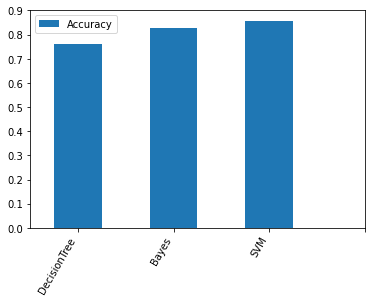

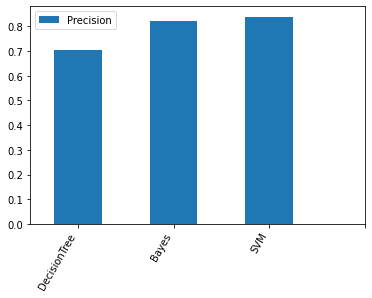

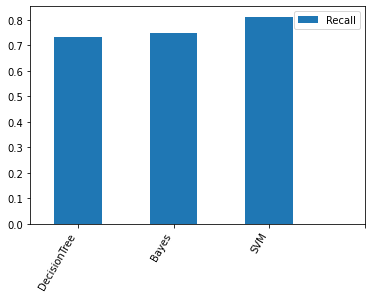

In [113]:
plt.figure(figsize=(20, 20))
acc_df = pd.DataFrame(accuracylist)
acc_df.plot.bar()
plt.xticks(np.arange(0, 4),acc_df['Model'],rotation=60,ha = 'right')
prec_df = pd.DataFrame(precisionlist)
prec_df.plot.bar()
plt.xticks(np.arange(0, 4),acc_df['Model'],rotation=60,ha = 'right')
rec_df = pd.DataFrame(recalllist)
rec_df.plot.bar()
plt.xticks(np.arange(0, 4),acc_df['Model'],rotation=60,ha = 'right')

plt.show()

- Theo như biểu đồ biểu thị ở trên ta quan sát thấy mô hình SVM cho kết quả phân lớp tốt nhất. Tuy nhiên do độ phức tạp của SVM khó nên khó có thể minh họa được ta, vì vậy ta sẽ sử dụng mô hình DecisionTree để minh họa cách hoạt động của mô hình trên tập dữ liệu của chúng ta
- Theo như ta quan sát thấy rằng mô hình Bayes cho ra kết quả khá tốt và mô hình tương đối dễ hiểu và diễn giải => vì vậy có thể sử dụng mô hình này cho những hướng phát triển tiếp theo của dự án
- Dưới đây là biểu đồ cây thể hiện cách hoạt động của model DecisionTree

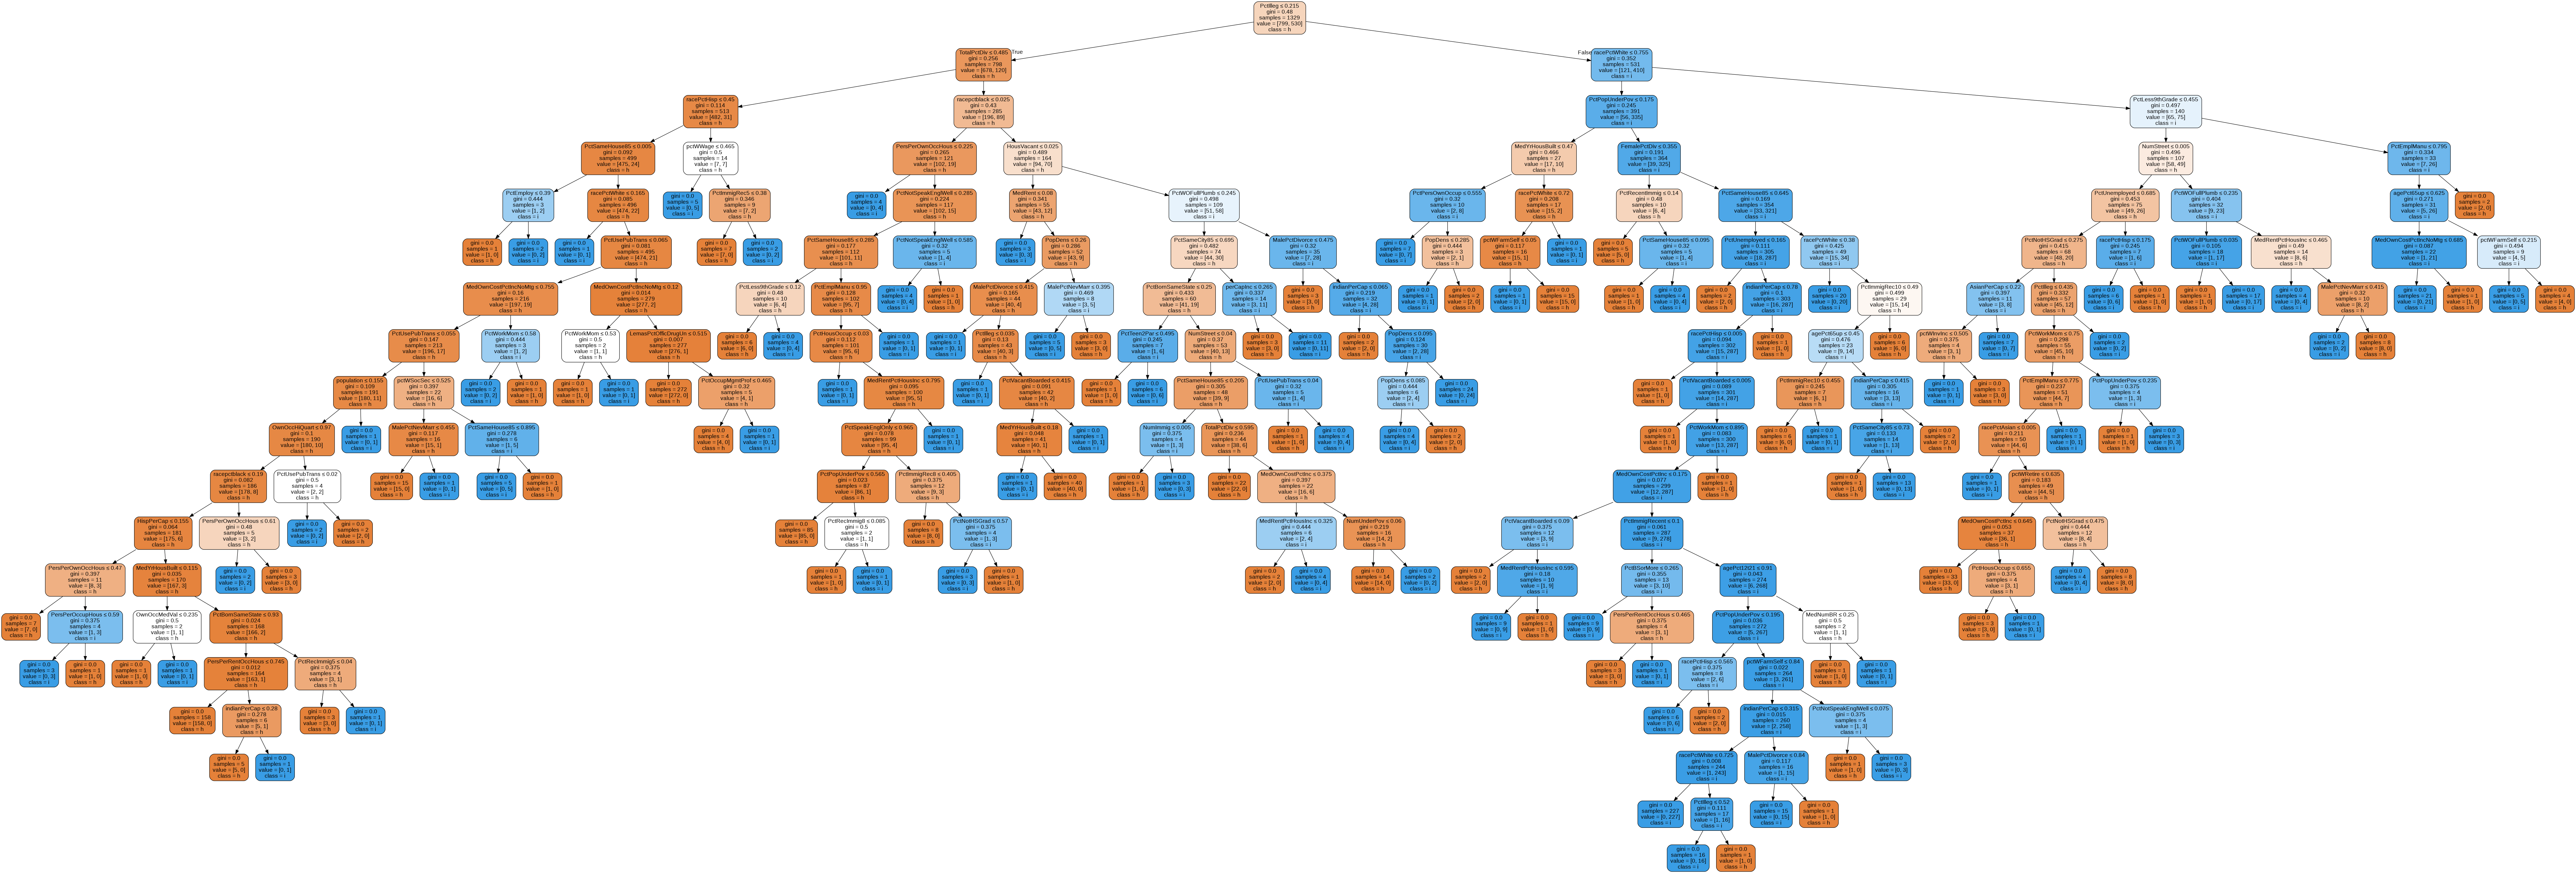

In [114]:
from sklearn import tree
from IPython.display import Image 
import pydotplus
dot_data = tree.export_graphviz(dt_estimator, out_file=None, 
                         feature_names=features,  
                         class_names=target,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

- Như đã phân tích ở trên thì mô hình Bayes cho ra kết quả tốt vì vậy ta sẽ sử dụng mô hình này để thiết kế một trang web dự đoán xem mức độ tội phạm đạt mức độ cao hay thấp với những thuộc tính đầu vào
- Nhưng vì lí do là tập dữ liệu này quá lớn và có nhiều thuộc tính vì vậy ta sẽ biểu thị top 10 thuộc tính có ảnh hưởng lớn đến mô hình nhất
- Ta sẽ thiết kế 1 trang web với 10 thuộc tính đầu vào để dự đoán mức độ tội phạm

['PctKids2Par', 'PctIlleg', 'PctFam2Par', 'racePctWhite', 'PctYoungKids2Par', 'pctWInvInc', 'PctTeen2Par', 'FemalePctDiv', 'pctWPubAsst', 'TotalPctDiv']
Main Features for GaussianNB


<Figure size 720x360 with 0 Axes>

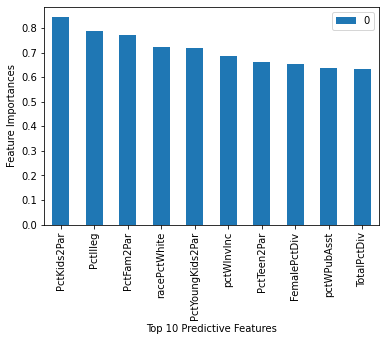

In [115]:
# Ta lấy 10 thuộc tính có ảnh hưởng lớn
crime_df_NB = crime_data
topfeatures = 10
# Tính giá trị trung bình cho tất cả thuộc tính
mean_all_col = crime_df_NB.groupby('highCrime').mean()
mean_T = mean_all_col.iloc[1]
mean_F = mean_all_col.iloc[0]
std_allcol = crime_df_NB.groupby('highCrime').apply(lambda x: x.std())
std_T=std_allcol.iloc[1]
std_F=std_allcol.iloc[0]

# được tính theo công thức: |μT-μF|/(σT+σF)
# μT - Giá trị trung bình của lớp True cho mỗi thuộc tính
# μF - Giá trị trung bình của lớp False cho mỗi thuộc tính
# σT - Độ lệch chuẩn của lớp True cho mỗi thuộc tính
# σF - Độ lệch chuẩn của lớp False cho mỗi thuộc tính

norm_abs_diff = (abs(mean_T-mean_F))/(std_T+std_F)

features_NB=norm_abs_diff.sort_values(ascending=False)
features_NB = features_NB.head(topfeatures)

featurelist = list(features_NB.keys())
featureval = list(features_NB.values)
print(featurelist)
print("Main Features for GaussianNB")    
plt.figure(figsize=(10, 5))
df_list_NB = pd.DataFrame(featureval,featurelist)
df_list_NB.plot.bar()
plt.xlabel('Top '+str(topfeatures)+' Predictive Features')
plt.ylabel('Feature Importances')
plt.show()

Ta xem qua một chút về 10 thuộc tính có ảnh hưởng lớn với mô hình
- **PctKid2Par**: tỷ lệ phần trăm trẻ em ở trong gia đình có cha và mẹ có nghĩa là những đứa trẻ có cha và mẹ dạy dỗ => có cuộc sống tốt => sẽ ít phạm tội hơn
- **TotalPctDiv**: phần trăm dân số đã ly hôn ảnh hưởng rất lớn đến vấn đề tội phạm => bởi vì sẽ có lí do khiến họ trở nên nóng nảy hơn
- **racePctWhite**: tỉ lệ người da trắng cũng làm ảnh hưởng rất lớn trong vấn đề tội phạm
- **PctTeen2Par**: phần trăm trẻ em từ 12-17 tuổi trong hai hộ gia đình có cha mẹ cũng ảnh hưởng rất lớn bởi vì đây là độ tuổi của sự thay đổi tính cách
- ***.....***

**Đây là mô hình Bayes sử dụng 10 thuộc tính quan trọng để dự đoán mức độ tội phạm**

In [116]:
from sklearn.naive_bayes import GaussianNB

features = ['PctKids2Par', 'PctIlleg', 'PctFam2Par', 'racePctWhite', 'PctYoungKids2Par', 'pctWInvInc', 'PctTeen2Par', 'FemalePctDiv', 'pctWPubAsst', 'TotalPctDiv']
X = crime_data[features]
y = crime_data['highCrime']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3.0, random_state=5)
print(X_train.head())
print(y_train.head())

G_Naive_Bayes = GaussianNB()
G_Naive_Bayes.fit(X_train,y_train)
#Predict
Y_pred = G_Naive_Bayes.predict(X_test)

print("Classification Report")
print(metrics.classification_report(y_test, Y_pred))
print("Accuracy \t=",np.round(metrics.accuracy_score(y_test,Y_pred),2))
print("Precision \t=",np.round(metrics.precision_score(y_test,Y_pred),2))
print("Recall \t \t=",np.round(metrics.recall_score(y_test,Y_pred),2))
accuracylist.append({'Model':'Bayes','Accuracy':metrics.accuracy_score(y_test,Y_pred)})
precisionlist.append({'Model':'Bayes','Precision':metrics.precision_score(y_test,Y_pred)})
recalllist.append({'Model':'Bayes','Recall':metrics.recall_score(y_test,Y_pred)})

      PctKids2Par  PctIlleg  PctFam2Par  ...  FemalePctDiv  pctWPubAsst  TotalPctDiv
477          0.58      0.23        0.62  ...          0.34         0.67         0.32
1008         0.48      0.38        0.42  ...          0.59         0.44         0.57
1191         0.69      0.09        0.64  ...          0.73         0.17         0.74
1083         0.48      0.22        0.43  ...          0.50         0.64         0.50
1398         0.67      0.17        0.70  ...          0.46         0.30         0.48

[5 rows x 10 columns]
477      True
1008     True
1191    False
1083     True
1398    False
Name: highCrime, dtype: bool
Classification Report
              precision    recall  f1-score   support

       False       0.86      0.86      0.86       389
        True       0.80      0.80      0.80       276

    accuracy                           0.83       665
   macro avg       0.83      0.83      0.83       665
weighted avg       0.83      0.83      0.83       665

Accuracy 	= 0.83
Pr